# **# Understanding the Project & Setting Objectives**

In [12]:
!pip install scikit-fuzzy

In [13]:
# Importing Packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **# Data Collection**

In [14]:
# Loading Data:
movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Netflix_Movie_Ratings_Prediction/DataSet/Netflix_DataSet.csv")
movies

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [15]:
# Exploring Data:
print(movies.shape, "\n")
print(movies.info(), "\n")
print(movies.dtypes, "\n")
print(movies.describe())

(7789, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None 

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object 

       Show_Id 

# **# Data Preprocessing**

In [16]:
# Checking For Missing Values
movies.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [17]:
# Filling Null Missing Values:
movies['Director']  = movies['Director'].fillna(value = 'Unknown')
movies['Cast']  = movies['Cast'].fillna(method = 'ffill')
movies['Country']  = movies['Country'].fillna(value = 'United States')
movies['Rating']  = movies['Rating'].fillna(method = 'bfill')
movies['Release_Date'] = movies['Release_Date'].fillna(method = 'ffill')
movies[['Director', 'Cast', 'Country', 'Rating']]

<ipython-input-17-8e3b55307aa0>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  movies['Cast']  = movies['Cast'].fillna(method = 'ffill')
<ipython-input-17-8e3b55307aa0>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  movies['Rating']  = movies['Rating'].fillna(method = 'bfill')
<ipython-input-17-8e3b55307aa0>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  movies['Release_Date'] = movies['Release_Date'].fillna(method = 'ffill')


,Director,Cast,Country,Rating
0,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA
1,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA
2,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R
3,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13
4,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13
...,...,...,...,...
7784,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",TV-MA
7785,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,TV-14
7786,Unknown,Nasty C,United States,TV-MA
7787,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,TV-PG


In [18]:
# Checking For Missing Values After Filling Null Places:
movies.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


In [19]:
# Checking For Duplicated Rows
print(movies.duplicated().sum())

2


In [20]:
# Handling duplicated Rows
movies.drop_duplicates(inplace=True)
print(movies.duplicated().sum())

0


In [21]:
# Normalizing Numerical Features:
def parse_duration(duration):
    if "min" in duration:
        return int(duration.replace(" min", ""))
    elif "Season" in duration:
        return int(duration.split()[0]) * 100
    else:
        return 0

movies["Duration"] = movies["Duration"].apply(parse_duration)

movies['Release_Date'] = pd.to_datetime(movies['Release_Date'], errors='coerce').dt.year
movies['Release_Date'] = movies['Release_Date'].fillna(movies['Release_Date'].median())
movies['Release_Date'] = (movies['Release_Date'] - movies['Release_Date'].min()) / (movies['Release_Date'].max() - movies['Release_Date'].min())

movies_copy = movies.copy()
movies_df = movies.drop(columns=["Show_Id", "Title", "Description"])

label_encoders = {}
movies = pd.DataFrame()

for column in movies_df.columns:
    le = LabelEncoder()
    movies[column] = le.fit_transform(movies_df[column])
    label_encoders[column] = le

In [22]:
# Checking For Remaining Missing Values:
print("\nMissing values after preprocessing")
print(movies.isnull().sum())

print("\nProcessed dataset shape:", movies.shape)
print("Processed columns:", movies.columns.tolist())


Missing values after preprocessing
Category        0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
dtype: int64

Processed dataset shape: (7787, 8)
Processed columns: ['Category', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type']


# **# Data Training and testing**

In [23]:
# Splitting Data into Train and Test Sets:
x = movies.drop(columns=['Rating'])
y = movies['Rating']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("\nTraining set shape: ", X_train.shape, y_train.shape)
print("Test set shape: ", X_test.shape, y_test.shape)


Training set shape:  (6229, 7) (6229,)
Test set shape:  (1558, 7) (1558,)


In [24]:
# Saving The Processed DataSet:
movies.to_csv('processed_netflix_data.csv', index=False)

print("\nData preprocessing and splitting completed successfully!")
print("Ready for model training and evaluation.")


Data preprocessing and splitting completed successfully!
Ready for model training and evaluation.


# **# Application of Mining Techniques**

In [25]:
# Implementing Fuzzy Logic:
rating = ctrl.Antecedent(np.arange(0, len(label_encoders['Rating'].classes_)), 'rating')
duration = ctrl.Antecedent(np.arange(0, movies['Duration'].max()+1), 'duration')
category = ctrl.Antecedent(np.arange(0, len(label_encoders['Category'].classes_)), 'category')

predicted_rating = ctrl.Consequent(np.arange(0, len(label_encoders['Rating'].classes_)), 'predicted_rating')

rating.automf(names=label_encoders['Rating'].classes_)
duration.automf(3, names=['short', 'medium', 'long'])
category.automf(names=label_encoders['Category'].classes_)
predicted_rating.automf(names=label_encoders['Rating'].classes_)

rule1 = ctrl.Rule(category['Movie'] & duration['long'], predicted_rating['TV-MA'])
rule2 = ctrl.Rule(category['TV Show'] & duration['short'], predicted_rating['TV-PG'])
rule3 = ctrl.Rule(rating['PG-13'] & duration['medium'], predicted_rating['PG-13'])

rating_system = ctrl.ControlSystem([rule1, rule2, rule3])
rating_simulator = ctrl.ControlSystemSimulation(rating_system)

rating_simulator.input['category'] = label_encoders['Category'].transform(['Movie'])[0]
rating_simulator.input['duration'] = 120
rating_simulator.input['rating'] = label_encoders['Rating'].transform(['PG-13'])[0]

rating_simulator.compute()

predicted_numeric = rating_simulator.output['predicted_rating']
predicted_label = label_encoders['Rating'].inverse_transform([int(round(predicted_numeric))])[0]
print(f"Predicted Label: {predicted_label}")

Predicted Label: R


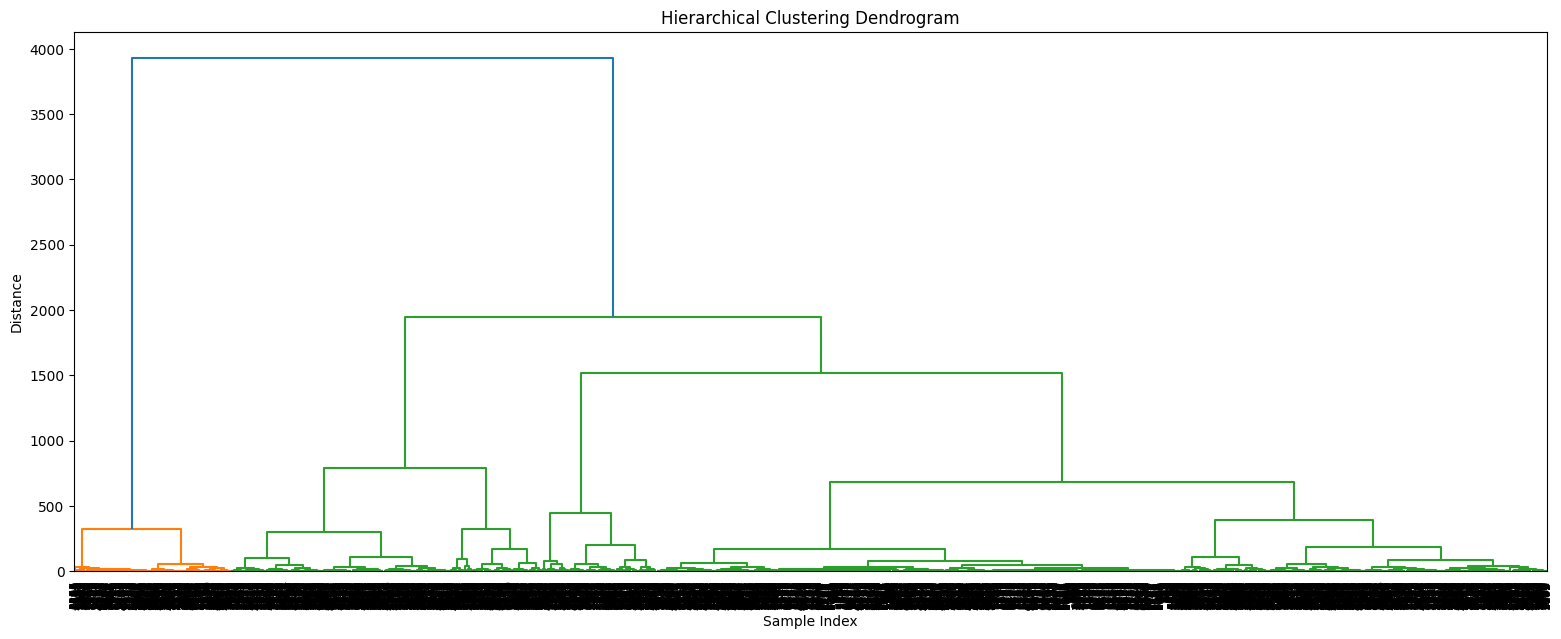

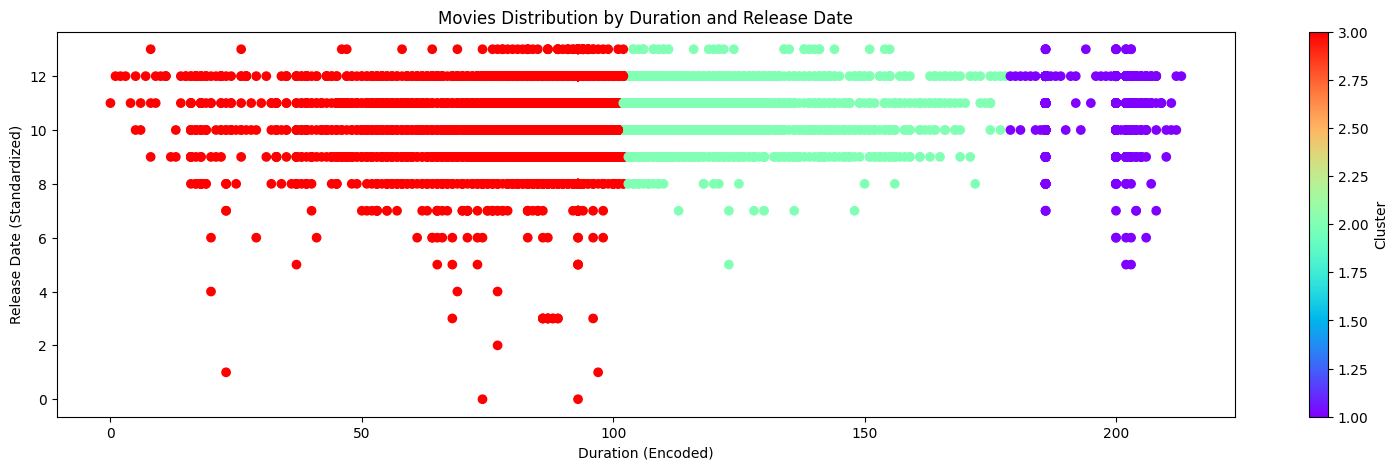


Rating Distribution in Clusters:
Rating     0    1     2      3      4      5       6      7       8      9   \
Cluster                                                                       
1         NaN  NaN   2.0    1.0    3.0    2.0   202.0   34.0   332.0   80.0   
2         4.0  2.0  18.0   45.0  151.0  247.0   602.0   11.0   412.0  150.0   
3        35.0  1.0  64.0  201.0  232.0  417.0  1127.0  149.0  2123.0  577.0   

Rating      10     11   12   13  
Cluster                          
1         75.0   96.0  1.0  NaN  
2          NaN    3.0  NaN  2.0  
3        205.0  173.0  5.0  3.0  


In [32]:
# Implementing Hierarchical Clustering:

cluster_data = movies[['Duration', 'Release_Date']].values

Z = linkage(cluster_data, method='ward', metric='euclidean')

plt.figure(figsize=(19, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.show()

clusters = fcluster(Z, t=3, criterion='maxclust')
movies['Cluster'] = clusters

print('\n')
plt.figure(figsize=(19, 5))
plt.scatter(movies['Duration'], movies['Release_Date'], c=movies['Cluster'], cmap='rainbow')
plt.title('Movies Distribution by Duration and Release Date')
plt.xlabel('Duration (Encoded)')
plt.ylabel('Release Date (Standardized)')
plt.colorbar(label='Cluster')
plt.show()

cluster_analysis = movies.groupby('Cluster')['Rating'].value_counts().unstack()
print("\nRating Distribution in Clusters:")
print(cluster_analysis)

# **# Evaluation Metric**

In [33]:
# Implementing Silhouette Score For Hierarchical Clustering:
cluster_data = movies[['Duration', 'Release_Date']].values
clusters = movies['Cluster']

sil_score = silhouette_score(cluster_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5681


# **# Visualization**

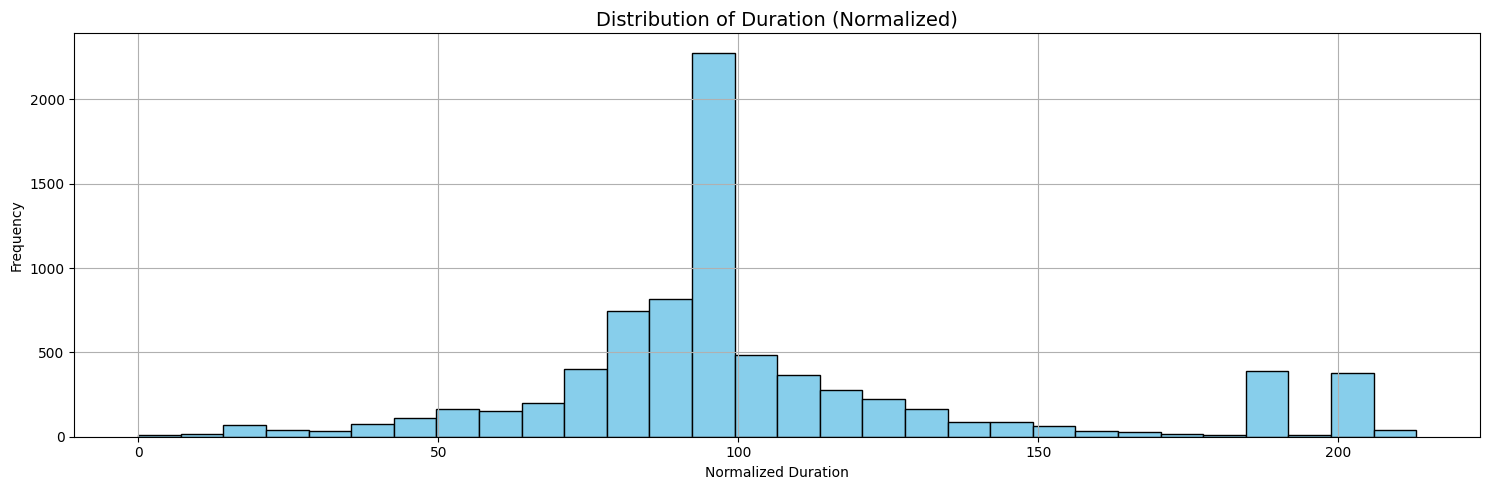

In [28]:
# implementing Histogram Of Duration
plt.figure(figsize=(15,5))
plt.hist(movies['Duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration (Normalized)', fontsize=14)
plt.xlabel('Normalized Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-29-b9f692aaa8e4>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([movies[movies['Release_Date'] > 0.2]['Duration'],


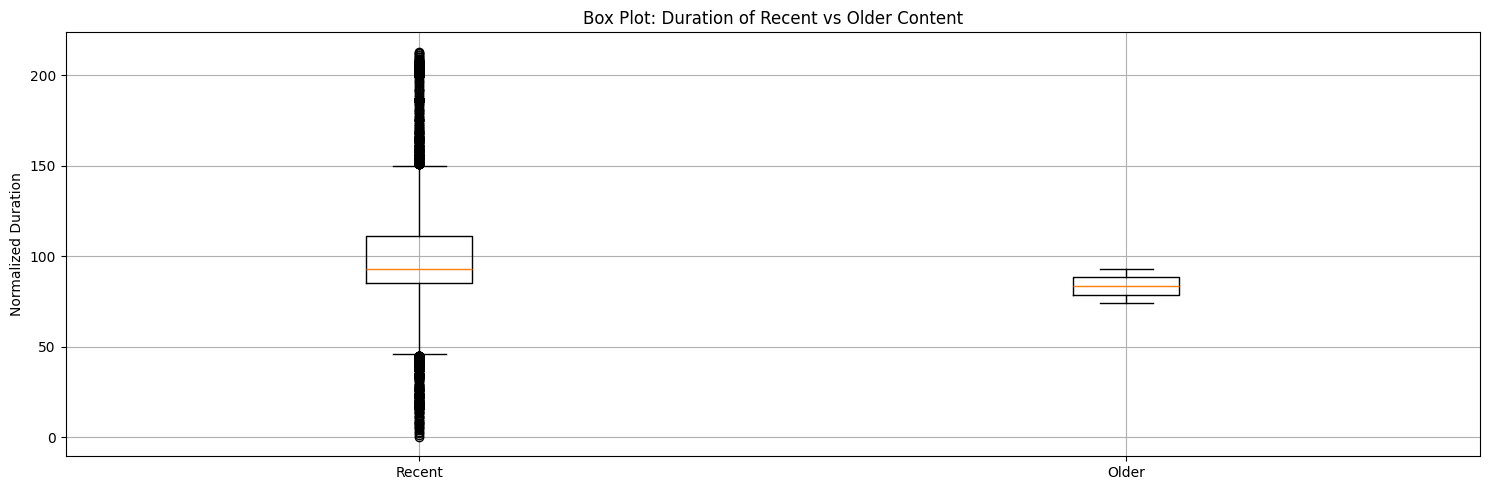

In [29]:
# implementing Box Plot Of Release Year Vs Duration
plt.figure(figsize=(15,5))
plt.boxplot([movies[movies['Release_Date'] > 0.2]['Duration'],
             movies[movies['Release_Date'] <= 0.2]['Duration']],
            labels=['Recent', 'Older'])
plt.title('Box Plot: Duration of Recent vs Older Content')
plt.ylabel('Normalized Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

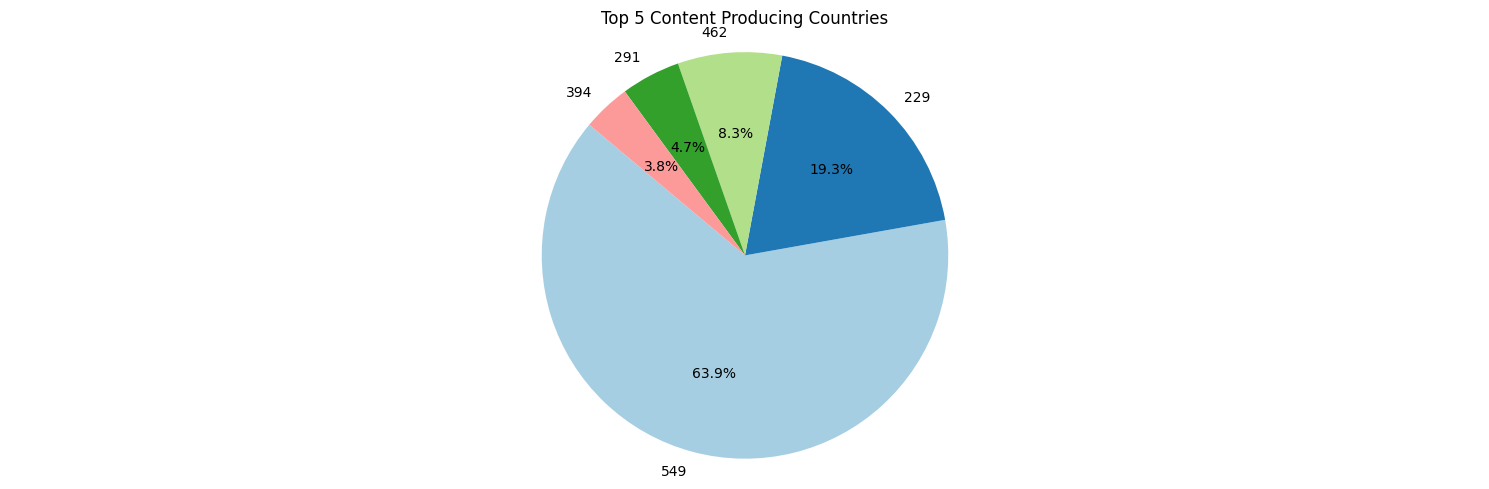

In [30]:
top_countries = movies['Country'].value_counts().nlargest(5)
plt.figure(figsize=(15,5))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Content Producing Countries')
plt.axis('equal')
plt.tight_layout()
plt.show()

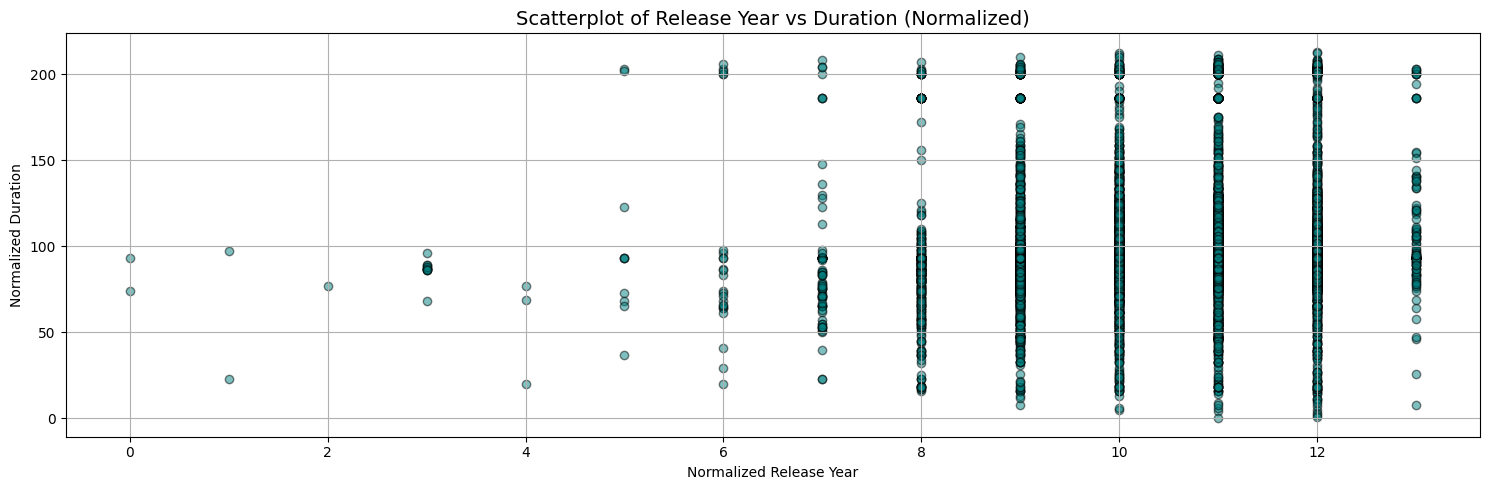

In [31]:
plt.figure(figsize=(15,5))
plt.scatter(movies['Release_Date'], movies['Duration'], alpha=0.5, color='teal', edgecolor='black')
plt.title('Scatterplot of Release Year vs Duration (Normalized)', fontsize=14)
plt.xlabel('Normalized Release Year')
plt.ylabel('Normalized Duration')
plt.grid(True)
plt.tight_layout()
plt.show()